In [1]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(["science", "notebook", "muted"])
plt.rcParams["text.usetex"] = False


import numpy as np

In [2]:
import gpr_fit_utils

In [369]:
X = np.random.uniform(0, 3, (40, 1))
y = np.sin(2*np.pi*X) + 4*np.cos(0.5*2*np.pi*X**2)
y = y[:,0] + np.random.normal(0, 1, len(y))

X_true = np.linspace(0, 3, 1000)[:,np.newaxis]
y_true = np.sin(2*np.pi*X_true) + 4*np.cos(0.5*2*np.pi*X_true**2)
y_true = y_true[:,0]

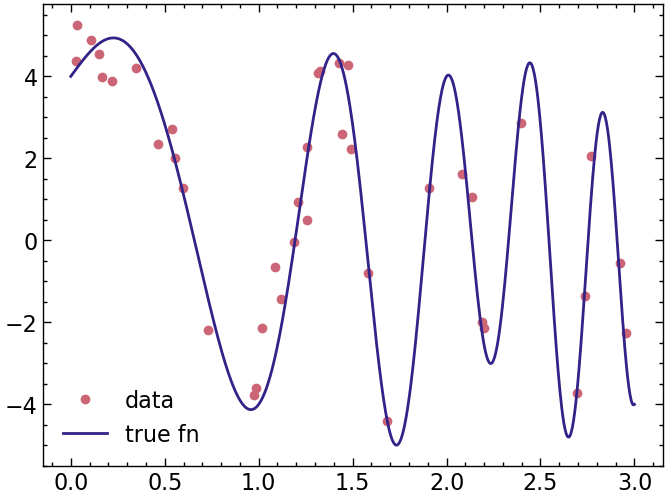

In [395]:
plt.plot(X, y, 'o', label='data')
plt.plot(X_true, y_true, label='true fn')
plt.legend()

In [372]:
fit_kwargs = {
    "range_dim_kernel": {"low": 32, "high": 256},
    "range_std_error" : {"low": 1e-3, "high": 1, "log": False},
    "range_std_kernel": {"low": 1e-3, "high": 50, "log": False},
    "show_progress_bar":True,
}
opt_output = gpr_fit_utils.optimize(
    X,
    y,
    n_trials=1000,
    normalise_y=True,
    fit_noise=True,
    std_scale=1,
    fit_kwargs=fit_kwargs
)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [373]:
y_ss = opt_output['y_ss']

In [374]:
opt_output.keys()

dict_keys(['study', 'model', 'y_ss'])

In [375]:
opt_output['study'].best_params

{'dim_kernel': 245,
 'std_kernel': 9.931422612591048,
 'std_error': 0.8277190562892934}

In [376]:
opt_output

{'study': <optuna.study.study.Study at 0x7f2744773a90>,
 'model': <rfflearn.cpu.rfflearn_cpu_gp.RFFGPR at 0x7f27447724d0>,
 'y_ss': StandardScaler()}

In [377]:
gpr_fit_utils.save('.', 'test-save-rff-model.h5', opt_output['model'])

In [378]:
l_model = gpr_fit_utils.load('test-save-rff-model.h5')

In [379]:
l_model['model'].s_e

0.8277190562892934

In [380]:
l_model['model'].kstd

9.931422612591048

In [381]:
l_model['model'].kdim

245

In [382]:
ref_model_results = {}
ref_model_results['mu'], ref_model_results['std'], ref_model_results['cov'] = opt_output['model'].predict(X, return_std=True, return_cov=True)

In [383]:
loaded_model_results = {}
loaded_model_results['mu'], loaded_model_results['std'], loaded_model_results['cov'] = l_model['model'].predict(X, return_std=True, return_cov=True)

In [384]:
np.testing.assert_array_equal(ref_model_results['mu'], loaded_model_results['mu'])

In [385]:
np.testing.assert_array_equal(ref_model_results['std'], loaded_model_results['std'])

In [386]:
np.testing.assert_array_equal(ref_model_results['cov'], loaded_model_results['cov'])

In [393]:
X_fine = np.linspace(-0.1, 3.1, 1000)[:,np.newaxis]
yhat = {}
yhat['mu'], yhat['std'], yhat['cov'] = opt_output['model'].predict(X_fine, return_std=True, return_cov=True)

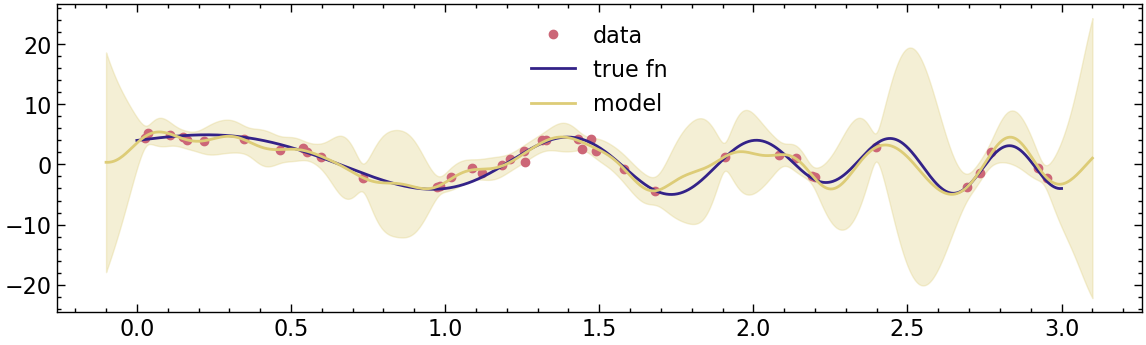

In [396]:
plt.figure(figsize=(14, 4))

plt.plot(X, y, 'o', label='data')
plt.plot(X_true, y_true, label='true fn')

mu_ = y_ss.inverse_transform(yhat['mu'][:,np.newaxis])[:,0]
lower_ = y_ss.inverse_transform((yhat['mu']-yhat['std'])[:,np.newaxis])[:,0]
upper_ = y_ss.inverse_transform((yhat['mu']+yhat['std'])[:,np.newaxis])[:,0]

plt.plot(X_fine, mu_, c='C2', label='model')
plt.fill_between(X_fine[:,0], lower_, upper_, alpha=0.3, color='C2')
plt.legend()

# plt.ylim(-5,5)

# try fitting coeff

In [397]:
X = np.load("X.npy")
coeffs = np.load("y.npy")
y = coeffs[:,0]

In [399]:
fit_kwargs = {
    "range_dim_kernel": {"low": 32, "high": 256},
    "range_std_error" : {"low": 1e-3, "high": 1, "log": False},
    "range_std_kernel": {"low": 1e-3, "high": 50, "log": False},
    "show_progress_bar":True,
}
opt_output = gpr_fit_utils.optimize(
    X,
    y,
    n_trials=100,
    normalise_y=True,
    fit_noise=True,
    std_scale=1,
    fit_kwargs=fit_kwargs
)

  0%|          | 0/100 [00:00<?, ?it/s]

In [400]:
y_ss = opt_output['y_ss']

In [401]:
opt_output.keys()

dict_keys(['study', 'model', 'y_ss'])

In [402]:
opt_output['study'].best_params

{'dim_kernel': 125,
 'std_kernel': 0.44729811768782435,
 'std_error': 0.16034922546613087}

In [403]:
opt_output

{'study': <optuna.study.study.Study at 0x7f2743dcb670>,
 'model': <rfflearn.cpu.rfflearn_cpu_gp.RFFGPR at 0x7f27445282e0>,
 'y_ss': StandardScaler()}

In [404]:
gpr_fit_utils.save('.', 'test-save-rff-model.h5', opt_output['model'])

In [405]:
l_model = gpr_fit_utils.load('test-save-rff-model.h5')

In [406]:
l_model['model'].s_e

0.16034922546613087

In [407]:
l_model['model'].kstd

0.44729811768782435

In [408]:
l_model['model'].kdim

125

In [409]:
ref_model_results = {}
ref_model_results['mu'], ref_model_results['std'], ref_model_results['cov'] = opt_output['model'].predict(X, return_std=True, return_cov=True)

In [410]:
loaded_model_results = {}
loaded_model_results['mu'], loaded_model_results['std'], loaded_model_results['cov'] = l_model['model'].predict(X, return_std=True, return_cov=True)

In [411]:
np.testing.assert_array_equal(ref_model_results['mu'], loaded_model_results['mu'])

In [412]:
np.testing.assert_array_equal(ref_model_results['std'], loaded_model_results['std'])

In [413]:
np.testing.assert_array_equal(ref_model_results['cov'], loaded_model_results['cov'])

In [424]:
X_zero_spins = np.zeros(shape=(1000, 2))

X_fine = np.linspace(1, 20, 1000)[:,np.newaxis]

X_fine = np.c_[X_fine, X_zero_spins]

yhat = {}
yhat['mu'], yhat['std'], yhat['cov'] = opt_output['model'].predict(X_fine, return_std=True, return_cov=True)

mu_ = y_ss.inverse_transform(yhat['mu'][:,np.newaxis])[:,0]
lower_ = y_ss.inverse_transform((yhat['mu']-yhat['std'])[:,np.newaxis])[:,0]
upper_ = y_ss.inverse_transform((yhat['mu']+yhat['std'])[:,np.newaxis])[:,0]

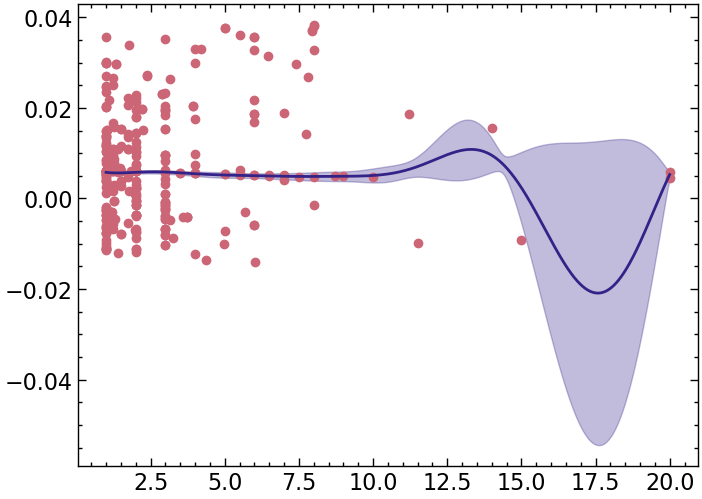

In [427]:
plt.plot(X[:,0], y, 'o')
plt.plot(X_fine[:,0], mu_, c='C1')
plt.fill_between(X_fine[:,0], lower_, upper_, alpha=0.3, color='C1')

In [422]:
yhat = {}
yhat['mu'], yhat['std'], yhat['cov'] = opt_output['model'].predict(X, return_std=True, return_cov=True)

mu_ = y_ss.inverse_transform(yhat['mu'][:,np.newaxis])[:,0]
lower_ = y_ss.inverse_transform((yhat['mu']-yhat['std'])[:,np.newaxis])[:,0]
upper_ = y_ss.inverse_transform((yhat['mu']+yhat['std'])[:,np.newaxis])[:,0]

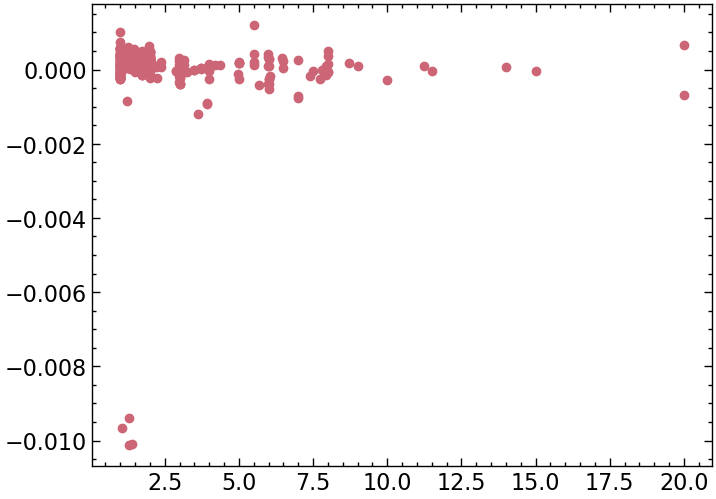

In [423]:
plt.scatter(X[:,0], y-mu_)

# try fitting merger waveform

In [439]:
import h5py
import prim.waveform

In [440]:
def load_hybrid_h5_file(hybrid_file, return_metadata=False):
    with h5py.File(hybrid_file, 'r') as f:
        hybrid_metadata = list(f.attrs.items())+[('filename', hybrid_file)]

        times = f['times'][:]
        hlms={}
        for l,m in f.attrs['modes']:
            hlms[l,m] = f[f"hlm_l{l}_m{m}"][:]

        hybrid_wf = prim.waveform.Waveform(times, hlms)

    if return_metadata:
        return hybrid_metadata, hybrid_wf
    else:
        return hybrid_wf

In [441]:
h5filename = "/scratch/sebastian.khan/data/ppmHM_2024_11_11/SXS_BBH_2498-Lev1__SEOBNRv4HM_PA.h5"

In [442]:
wf = load_hybrid_h5_file(h5filename)

In [446]:
wf.mask(-400, 100)

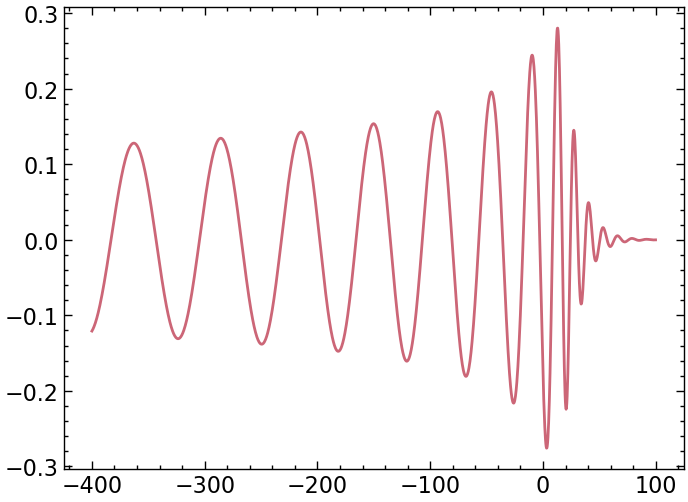

In [447]:
plt.plot(wf.times, wf.hlms[2,2].real)

In [448]:
X = wf.times[:,np.newaxis]
y = wf.hlms[2,2].real

In [451]:
fit_kwargs = {
    "range_dim_kernel": {"low": 32, "high": 256},
    "range_std_error" : {"low": 1e-3, "high": 1, "log": False},
    "range_std_kernel": {"low": 1e-3, "high": 50, "log": False},
    "show_progress_bar":True,
}
opt_output = gpr_fit_utils.optimize(
    X,
    y,
    n_trials=100,
    normalise_y=True,
    fit_noise=True,
    std_scale=1,
    fit_kwargs=fit_kwargs
)

  0%|          | 0/100 [00:00<?, ?it/s]

In [452]:
y_ss = opt_output['y_ss']

In [453]:
opt_output.keys()

dict_keys(['study', 'model', 'y_ss'])

In [454]:
opt_output['study'].best_params

{'dim_kernel': 231,
 'std_kernel': 0.5188204981861997,
 'std_error': 0.6230141003111648}

In [455]:
opt_output

{'study': <optuna.study.study.Study at 0x7f27421a6050>,
 'model': <rfflearn.cpu.rfflearn_cpu_gp.RFFGPR at 0x7f27421a7f10>,
 'y_ss': StandardScaler()}

In [461]:
X.shape

(1614, 1)

In [462]:
opt_output['study'].best_params['dim_kernel']

231

In [464]:
# speed up
X.shape[0] / opt_output['study'].best_params['dim_kernel']

6.987012987012987

In [456]:
yhat = {}
yhat['mu'], yhat['std'], yhat['cov'] = opt_output['model'].predict(X, return_std=True, return_cov=True)

mu_ = y_ss.inverse_transform(yhat['mu'][:,np.newaxis])[:,0]
lower_ = y_ss.inverse_transform((yhat['mu']-yhat['std'])[:,np.newaxis])[:,0]
upper_ = y_ss.inverse_transform((yhat['mu']+yhat['std'])[:,np.newaxis])[:,0]

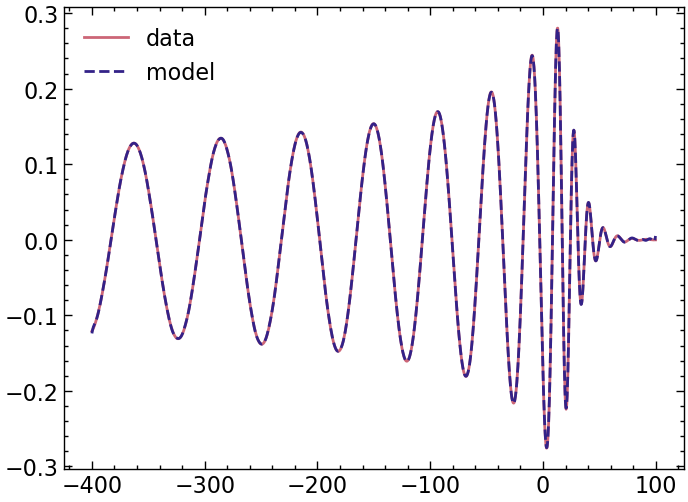

In [460]:
plt.plot(X, y, label='data')
plt.plot(X, mu_, ls='--', label='model')
plt.legend()